# **Table of Contents**

1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Importing Packages](#importing-packages)
4. [Loading Data](#loading-data)
5. [Data Preprocessing](#data-preprocessing)
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
7. [Model Training](#model-training)
  1. [Data Preprocessing](#data-preprocessing)
8. [Model Evaluation](#model-evaluation)
9. [Conclusion](#conclusion)


#**Introduction**
Over the years, financial instituions such as banks, microfinance institutions have determined the eligiblity of loan applicants by assessing their credit worthiness through their credit history, cash flow history, available collateral and character. However, this method still has not reduced the rate of non-performing loans aver the years because of the data is not always available and data sometimes has hidden patterns because of the large and complex nature of the data. This, therefore, warrants the need for a model to make the determination of a loan applicant's eligibility for a loan efficient and help banks improve on their credit risk management practices so that their stream of interest is not treacherous.

# **Problem Statement**
According to [Ntow- Gyamfi and Laryea (2012)](https://www.researchgate.net/publication/325248726_A_Financial_Performance_Comparison_of_Foreign_VS_Local_Banks_in_Ghana), financial institutions such as banks although important to every economy are very crucial in the case of developing countries. In the view of Shanmugan and Bourke (1990), the role of banks can be compared with blood arteries in the human body. This is because financial institutions just as blood arteries also pump financial resources (this time not blood) for economic growth from the depositories to where they are required.([Ntow- Gyamfi and Boateng (2013)](https://www.researchgate.net/publication/271068833_Credit_risk_and_loan_default_among_Ghanaian_banks_An_exploratory_study)) Banks are principally in the interest earning business. The interest earning nature of banks comes with the amount of loans that banks are able to advance to their customers. But when customers are default their loans, bank have some challenges. Non-performing loans affect bank greatly and have rippling effects on the economy because it pushes the banks to shrink credit to the private sector and thereby reduce productivity.

##**Objective**

Our model seeks to determine if individuals are eligible for loan based on the following factors:
               
* Gender of the Applicant

* Marital Status of the Applicant

* Number of Dependents of the Applicant

* Education Status of the Applicant

* If the Applicant is Self-Employed or not

* Applicant's Income  

* Coapplicant's Income     

* Principal Amount          

* The period for the loan repayment.     

* Credit History of the Applicant    

* Type of Residence Area of the Applicant.


#**Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#**Loading Dataset**

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Bloossom/Data Science/Machine Learning/ML Project/Loan_Data (1).csv')

#**Data Inspection, Cleaning and Preprocessing**

In [ ]:
for col in loan_data.columns:
    print(col)


Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


There are 13 columns present in the dataset

In [ ]:
loan_data.shape

(614, 13)

**Dimension: 611 rows X 13 columns**

In [ ]:
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
loan_data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

Deal with Stray charater (3+)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Data Type Constraints**

In [ ]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**There seem to be some data type constraints:**
1. Dependants is of data type object instead of integer.

**Duplicates**

In [ ]:
loan_data.duplicated().sum()

0

There are no duplicates in the  dataset.

**Uniqueness**

In [ ]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

These are the unique values of each column

In [ ]:
loan_data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [ ]:
loan_data['Gender'] .unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
loan_data['Education'] .unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
loan_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
loan_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
loan_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
loan_data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
loan_data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
loan_data['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
loan_data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

**Dealing with Stray Characters**

In [ ]:
loan_data['Dependents'].values

array(['0', '1', '0', '0', '0', '2', '0', '3+', '2', '1', '2', '2', '2',
       '0', '2', '0', '1', '0', '0', '0', '0', '1', '0', '2', '1', '0',
       '0', '2', '0', '2', '1', '0', '1', '0', '3+', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '2', '1', '2', '0', '0', '1', '2', '0', '3+', '0', '1', '0',
       '0', '0', '1', '3+', '0', '0', '2', '0', '3+', '3+', '0', '0', '1',
       '3+', '3+', '0', '1', '2', '0', '1', '0', '2', '0', '0', '0', '0',
       '2', '2', '0', '0', '0', '0', '0', '0', '0', '2', '0', nan, '0',
       nan, '1', '2', '0', '2', '3+', '0', '0', '0', '1', '0', '1', '0',
       '1', '0', '0', nan, '0', '0', '2', '0', '0', '3+', '0', '1', '0',
       '0', '0', '0', '0', '0', '3+', '0', '2', '0', '2', '2', '0', '0',
       '0', '2', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '3+',
       '1', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0',
       '2', '0', '3+', '3+', '0', '0', '0', '2', '3+

In [ ]:
loan_data['Dependents'] =loan_data['Dependents'].str.replace(r'3+','3')

In [ ]:
loan_data['Dependents'].values

array(['0', '1', '0', '0', '0', '2', '0', '3', '2', '1', '2', '2', '2',
       '0', '2', '0', '1', '0', '0', '0', '0', '1', '0', '2', '1', '0',
       '0', '2', '0', '2', '1', '0', '1', '0', '3', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '2', '1', '2', '0', '0', '1', '2', '0', '3', '0', '1', '0',
       '0', '0', '1', '3', '0', '0', '2', '0', '3', '3', '0', '0', '1',
       '3', '3', '0', '1', '2', '0', '1', '0', '2', '0', '0', '0', '0',
       '2', '2', '0', '0', '0', '0', '0', '0', '0', '2', '0', nan, '0',
       nan, '1', '2', '0', '2', '3', '0', '0', '0', '1', '0', '1', '0',
       '1', '0', '0', nan, '0', '0', '2', '0', '0', '3', '0', '1', '0',
       '0', '0', '0', '0', '0', '3', '0', '2', '0', '2', '2', '0', '0',
       '0', '2', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '3',
       '1', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0',
       '2', '0', '3', '3', '0', '0', '0', '2', '3', '1', '0', '1

Removed stray character(+)

In [ ]:
loan_data['Dependents'].dtype

dtype('O')

In [ ]:
loan_data['CoapplicantIncome'].dtype

dtype('float64')

In [ ]:
loan_data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
loan_data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
loan_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

There are missing values in the data.

**Missing Values**

In [ ]:
import missingno as msno

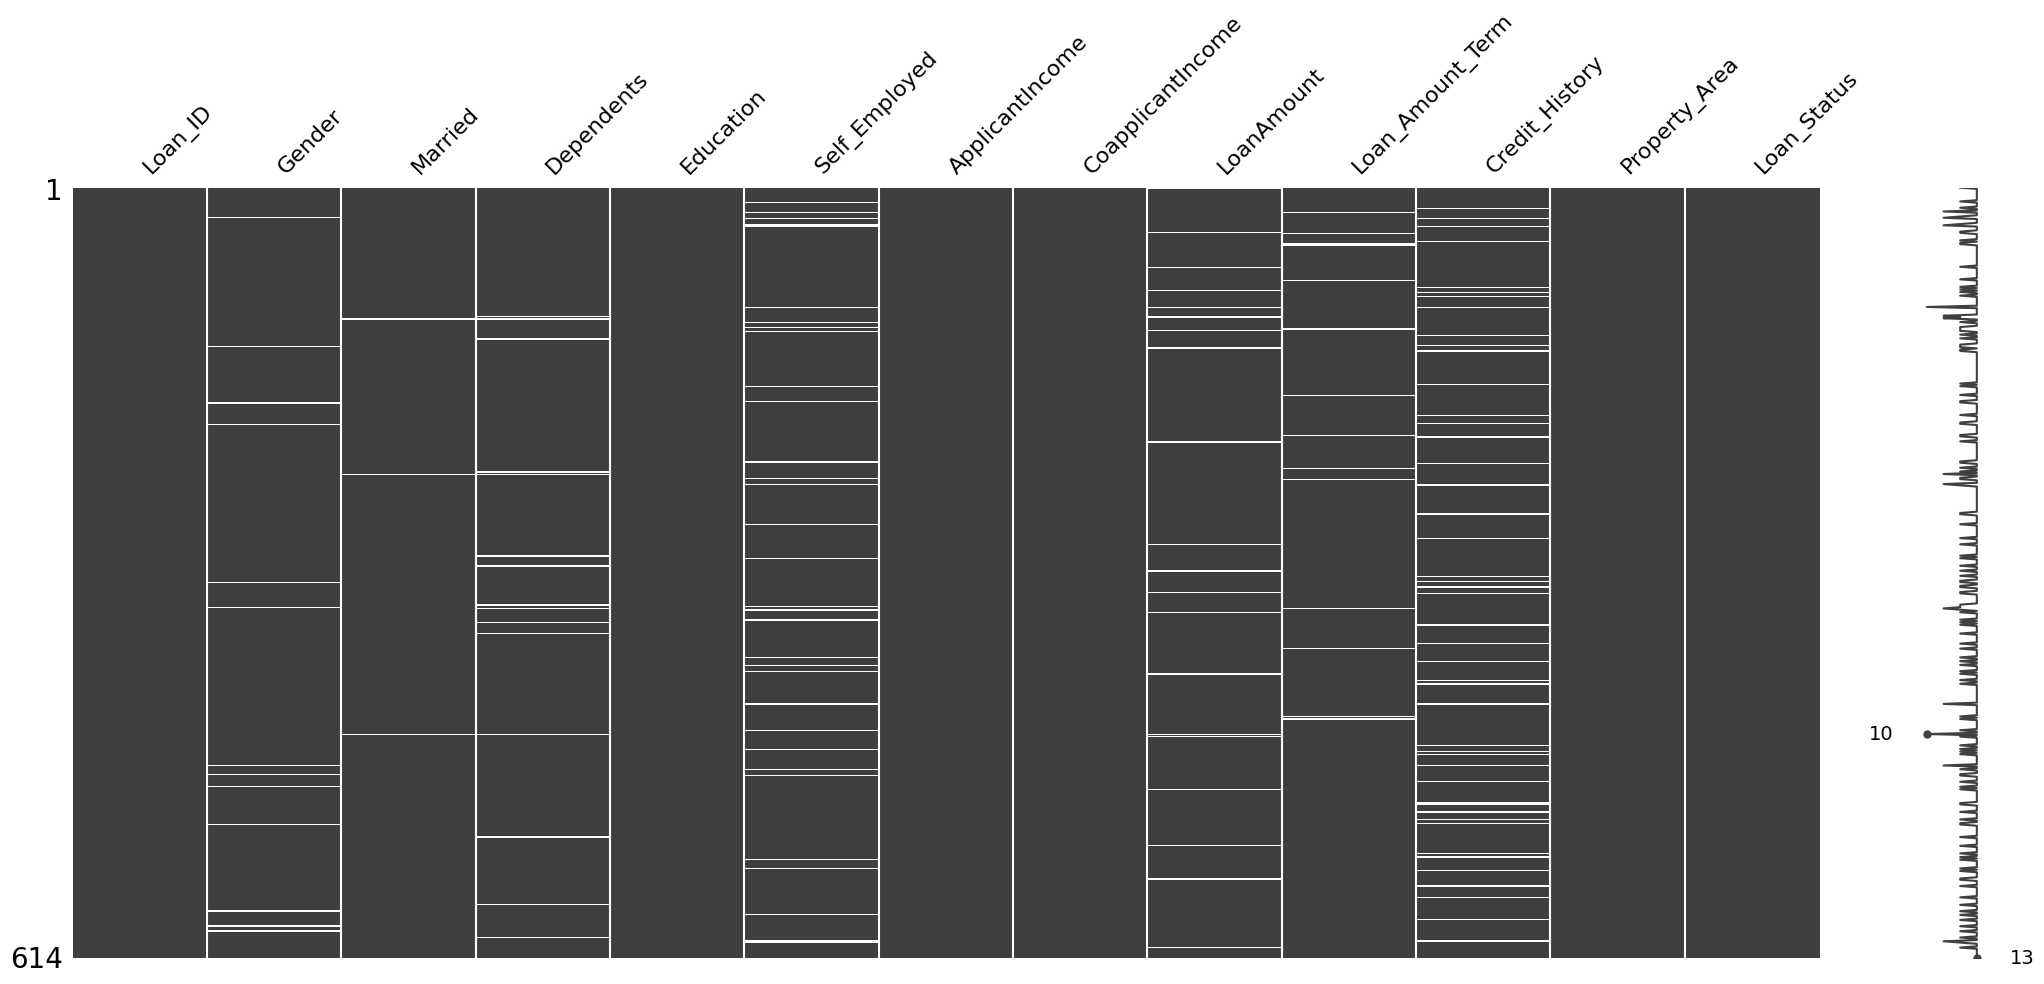

In [ ]:
# visualizing missing values
msno.matrix(loan_data,color=(0.25, 0.25, 0.25))
plt.show()

There are missing values in the following columns:
* Gender
* Married
* Dependants
* Self_employment
* LoanAmount
* Loan_Amount_Term
* CreditHistory

In [ ]:
loan_data.isna()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
609            False              False       False             False   
610            False              False       False             False   
611            False              False       False             False   
612            False              False       False             False   
613            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
609           False          False        False  
610           False          False        False  
611           False          False        False  
612           False          False        False  
613           False          False        False  

[614 rows x 13 columns]

In [ ]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Number of missing values in each column of the data
missing_val_count_by_column = (loan_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print( 'Total', missing_val_count_by_column[missing_val_count_by_column > 0].sum())

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64
Total 149


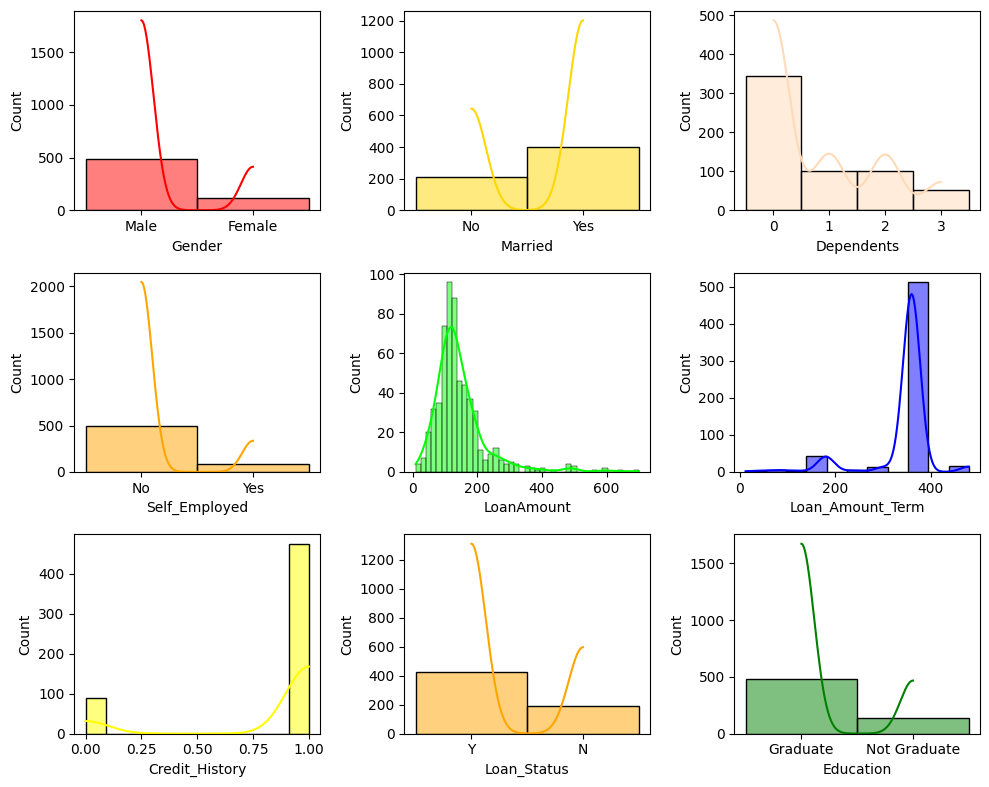

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(10, 8))

# Plot histograms
sns.histplot(data=loan_data, x="Gender", ax=axes[0,0], kde=True, color="r")
sns.histplot(data=loan_data, x="Married", ax=axes[0,1], kde=True, color="gold")
sns.histplot(data=loan_data, x="Dependents", ax=axes[0,2], kde=True, color="peachpuff")
sns.histplot(data=loan_data, x="Self_Employed", ax=axes[1,0], kde=True, color="orange")
sns.histplot(data=loan_data, x="LoanAmount", ax=axes[1,1], kde=True, color="lime")
sns.histplot(data=loan_data, x="Loan_Amount_Term", ax=axes[1,2], kde=True, color="blue")
sns.histplot(data=loan_data, x="Credit_History", ax=axes[2,0], kde=True, color="yellow")
sns.histplot(data=loan_data, x="Loan_Status", ax=axes[2,1], kde=True, color="orange")
sns.histplot(data=loan_data, x="Education", ax=axes[2,2], kde=True, color="green")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


##Categorical Columns

***Use the mode instead for categorical columns***

**Dependants**

In [ ]:
loan_data['Dependents'].mode()[0]

'0'

The mode is 0

In [ ]:
#Replacing 'nan' values with 'mode
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [ ]:
loan_data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].astype(int)

Data type constraint of the 'dependants' column corrected

In [ ]:
loan_data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

**Gender**

In [ ]:
loan_data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
#Replace 'nan' values with mode
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [ ]:
loan_data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

**Married**

Although the missing values are few, the mode is the best method to fill in the missing values.  
Dropping it is not appropriate because our data is less than 1000.

In [ ]:
loan_data ['Married'].mode()

0    Yes
Name: Married, dtype: object

In [ ]:
#Replace missing values with mode
loan_data ['Married'] =loan_data ['Married'].fillna(loan_data ['Married'].mode()[0])

In [ ]:
loan_data ['Married'].value_counts()


Married
Yes    401
No     213
Name: count, dtype: int64

**Self-employed**

In [ ]:
loan_data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

The mode for Self_Employed column is 'No'

In [ ]:
#Replace 'nan' values with the mode
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [ ]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
loan_data ['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

##Numerical Columns

**Credit_History**

***Ask for clarity on choice***

1.   We could use the median




In [ ]:
loan_data['Credit_History'].median()

1.0

The median is 1

In [ ]:
loan_data['Credit_History']=loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())

In [ ]:
loan_data['Credit_History']=loan_data['Credit_History'].astype(int)

In [ ]:
loan_data['Credit_History'].value_counts()

Credit_History
1    525
0     89
Name: count, dtype: int64

**Loan_Amount**

In [ ]:
loan_data['LoanAmount'].median()

128.0

The median is 128

In [ ]:
loan_data['LoanAmount'] =loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

In [ ]:
loan_data['LoanAmount'].value_counts()

LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

**Loan_Amount_Term**

In [ ]:
loan_data['Loan_Amount_Term'].median()

360.0

The median is 360

In [ ]:
loan_data['Loan_Amount_Term'] =loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())

In [ ]:
loan_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'] =loan_data['Loan_Amount_Term'].astype(int)

Verification of missing values

In [ ]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values

Summary Statistics

In [ ]:
loan_data.describe(include = np.number)

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.744300      5403.459283        1621.245798  145.752443   
std      1.009623      6109.041673        2926.248369   84.107233   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.250000   
50%      0.000000      3812.500000        1188.500000  128.000000   
75%      1.000000      5795.000000        2297.250000  164.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         342.410423        0.855049  
std           64.428629        0.352339  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000

In [ ]:
loan_data.describe(include = object)

Loan_ID Gender Married Education Self_Employed Property_Area  \
count        614    614     614       614           614           614   
unique       614      2       2         2             2             3   
top     LP001002   Male     Yes  Graduate            No     Semiurban   
freq           1    502     401       480           532           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422

There are high variations in:
* Gender
* Self_Employed
* Loan_Status

# **Exploratory Data Analysis**

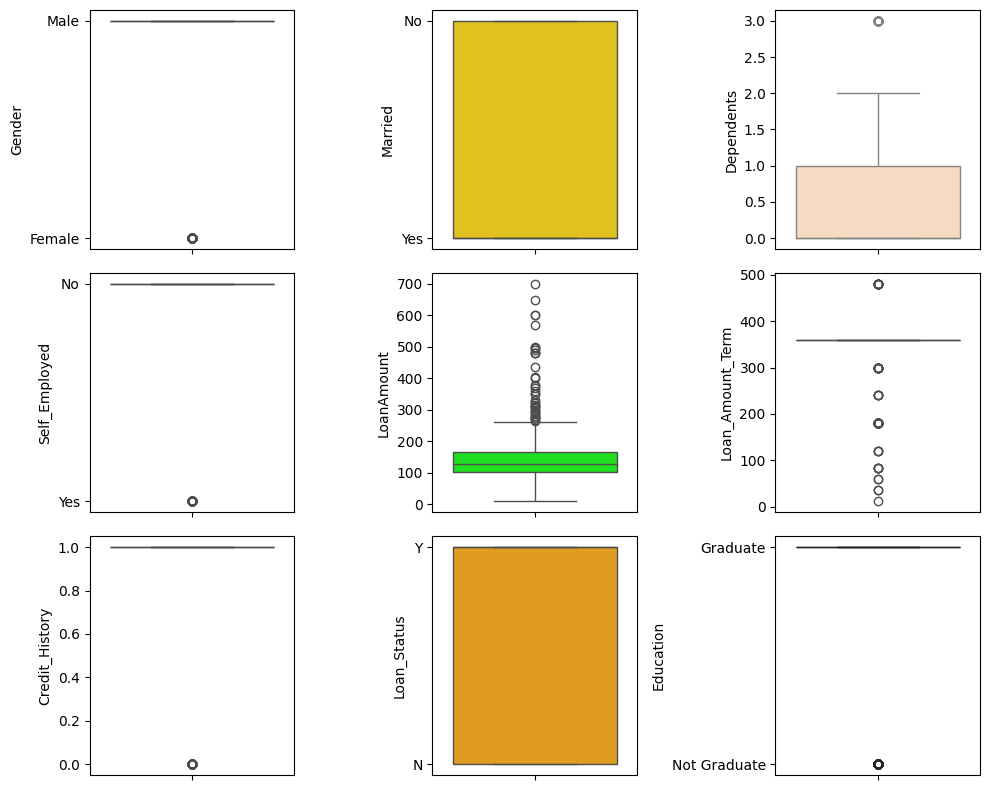

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(10, 8))

# Plot histograms
sns.boxplot(data=loan_data, y="Gender", ax=axes[0,0],  color="r")
sns.boxplot(data=loan_data, y="Married", ax=axes[0,1], color="gold")
sns.boxplot(data=loan_data, y="Dependents", ax=axes[0,2], color="peachpuff")
sns.boxplot(data=loan_data, y="Self_Employed", ax=axes[1,0], color="orange")
sns.boxplot(data=loan_data, y="LoanAmount", ax=axes[1,1], color="lime")
sns.boxplot(data=loan_data, y="Loan_Amount_Term", ax=axes[1,2], color="blue")
sns.boxplot(data=loan_data, y="Credit_History", ax=axes[2,0], color="yellow")
sns.boxplot(data=loan_data, y="Loan_Status", ax=axes[2,1], color="orange")
sns.boxplot(data=loan_data, y="Education", ax=axes[2,2], color="green")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
cat_var =  loan_data.select_dtypes(include = 'object')
num_var = loan_data.select_dtypes(np.number)

def cat_insp(var):
    print(cat_var[var].unique())
    print(cat_var[var].value_counts(normalize=True))
def cat_plot(var):
    sns.countplot(x=var, data=cat_var)
def num_plot(var):
    fig, ax=plt.subplots(1,2, figsize=(8, 4))
    sns.histplot(x=var,kde=True, data=num_var, ax=ax[0])
    sns.boxplot(x=var, data=num_var, ax=ax[1])


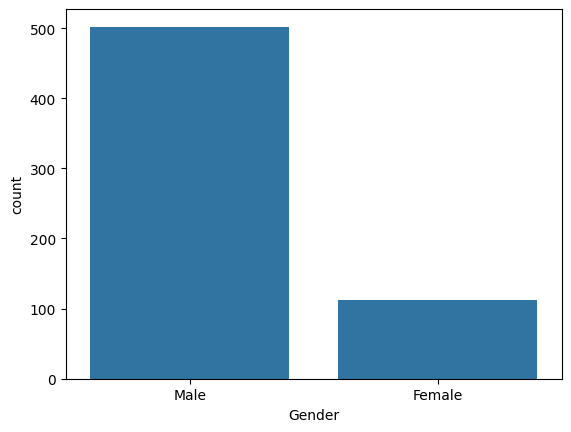

In [ ]:
cat_plot('Gender')

From the graph, There are more males than females. Hence, there is no much variation.   
We may drop the column or build the model without it.

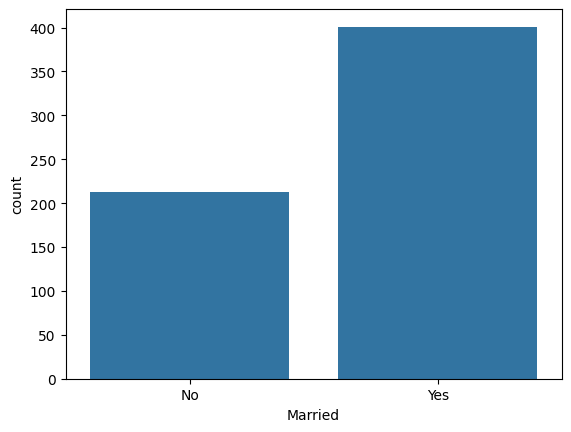

In [ ]:
cat_plot('Married')

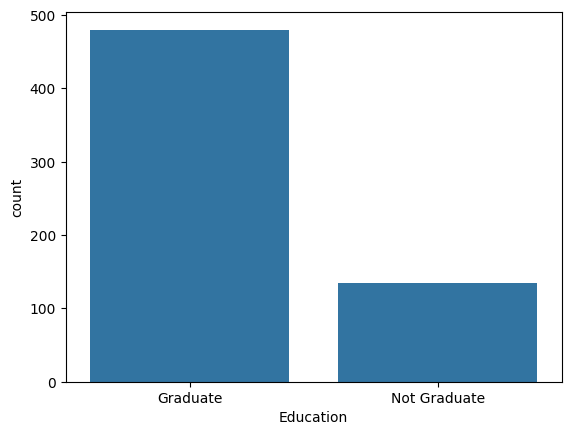

In [ ]:
cat_plot('Education')

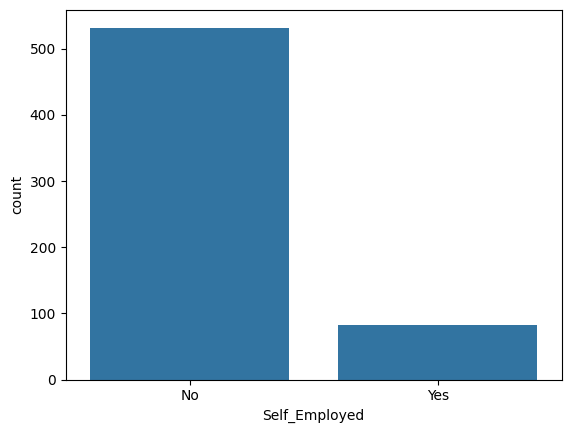

In [ ]:
cat_plot('Self_Employed')

May be dropped due to less variation.

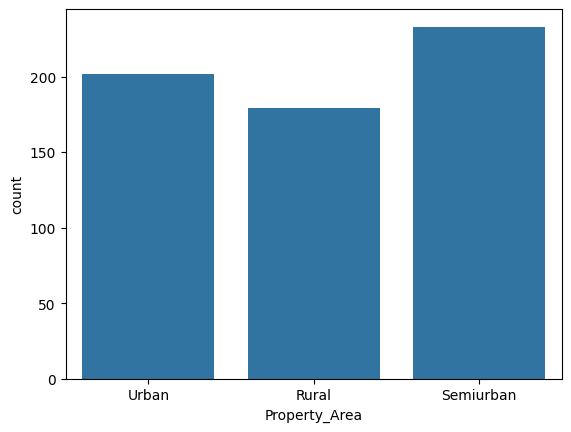

In [ ]:
cat_plot('Property_Area')

In [ ]:
cat_plot('Loan_Status')

***Dealing with Outliers in some columns***

In [ ]:
num_plot('Dependents')

In [ ]:
num_plot('LoanAmount')

There are outliers but these outliers are essential because it is needed

In [ ]:
num_plot('Loan_Amount_Term')

There are no outliers.
The data is discrete hence the markers.

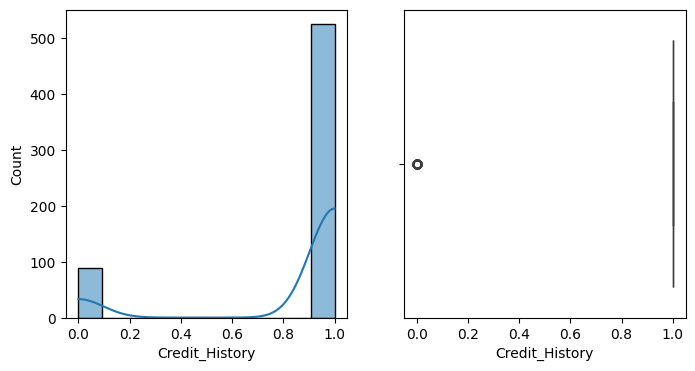

In [ ]:
num_plot('Credit_History')

May be dropped due to less variation

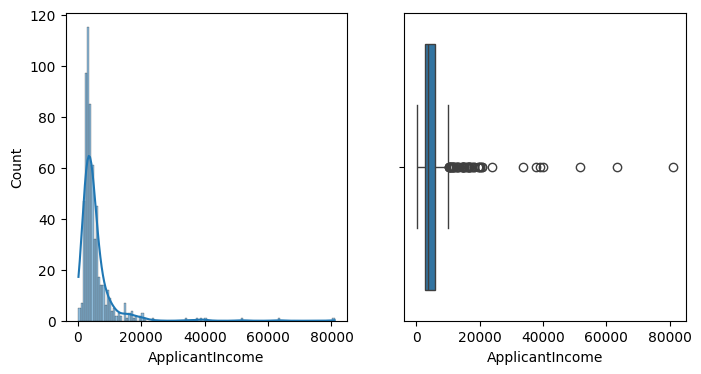

In [ ]:
num_plot('ApplicantIncome')

There are outliers but these outliers are essential hence, there will be no dropping.

This is because there are people who have extremely high incomes, hence it is not adviceable to drop the outliers.

In [ ]:
num_plot('CoapplicantIncome')

##Bivariate

In [ ]:
# define a procedure to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):

    # create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # create a boxplot based on the specified parameter
    sns.boxplot(ax=axes[0], y=y, x=x, showmeans=True, palette='muted', data=data)
    axes[0].set_title(f'Boxplot of {label} by Loan Status', y=1.05)

    # create a histplot based on the specified parameter
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, palette='muted')
    axes[1].set_title(f'Histogram of {label} by Loan Status', y=1.05)

    plt.tight_layout()
    plt.show()

In [ ]:
distribution_bivariate(loan_data,'Loan_Status', 'LoanAmount','Loan_Status',8, 6,'LoanAmount')

In [ ]:
distribution_bivariate(loan_data,'Loan_Status', 'Loan_Amount_Term','Loan_Status',10, 6,'Loan_Amount_Term')

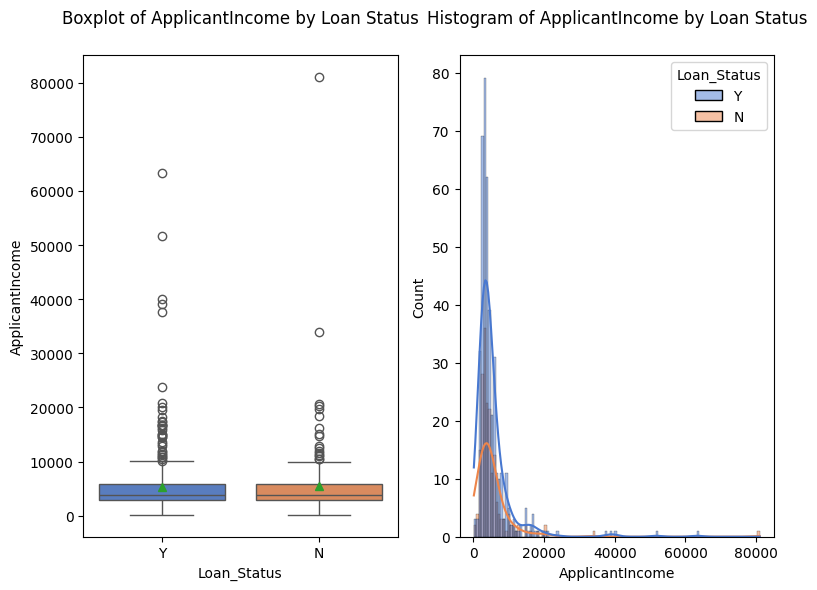

In [ ]:
distribution_bivariate(loan_data,'Loan_Status', 'ApplicantIncome','Loan_Status',8, 6,'ApplicantIncome')

**Multivaraite**

<Figure size 1000x600 with 0 Axes>

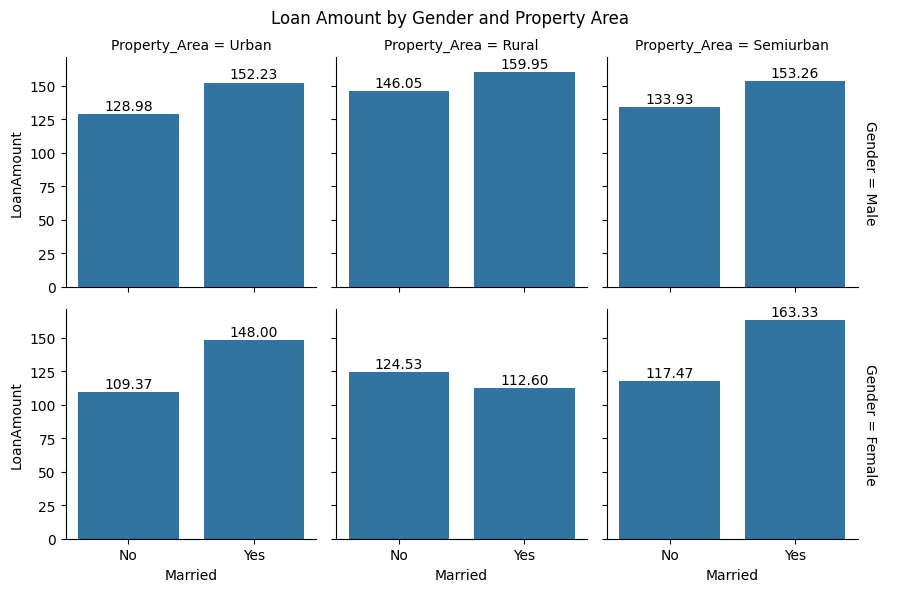

In [ ]:
plt.figure (figsize=(10,6))

# Create the FacetGrid
g = sns.FacetGrid(loan_data, col='Property_Area', row='Gender', margin_titles=True)

# Define a function to add data labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:1.2f}'.format(height),
            ha="center", va="bottom", fontsize=10
        )

# Map the barplot and add labels
g.map(sns.barplot, 'Married', 'LoanAmount', order=['No', 'Yes'], errorbar=None)
# Iterate through each axis to add labels
for ax in g.axes.flat:
    add_labels(ax)

# Add a title above the entire plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Amount by Gender and Property Area', fontsize=12)

# Add legend
g.add_legend()

# Show the plot
plt.show()

In [ ]:
plt.figure (figsize=(10,6))

# Create the FacetGrid
g = sns.FacetGrid(loan_data, col='Property_Area', row='Gender', margin_titles=True)

# Define a function to add data labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:1.2f}'.format(height),
            ha="center", va="bottom", fontsize=10
        )

# Map the barplot and add labels
g.map(sns.barplot, 'Credit_History', 'LoanAmount', order=[0, 1], errorbar=None)
# Iterate through each axis to add labels
for ax in g.axes.flat:
    add_labels(ax)

# Add a title above the entire plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Amount by Gender and Property Area', fontsize=12)

# Add legend
g.add_legend()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

Loan Defaults

In [ ]:
# Group by Gender, ApplicantIncome, and Credit_History, and count the defaults
defaults_by_gender_income = loan_data[ loan_data['Credit_History'] == 0].groupby(['Gender', 'LoanAmount']).size().reset_index(name='Default_Count')

# Sum the default counts for each gender
total_defaults_by_gender = defaults_by_gender_income.groupby('Gender')['Default_Count'].sum().reset_index()

total_defaults_by_gender
defaults_by_gender_income

Gender  LoanAmount  Default_Count
0   Female        71.0              1
1   Female        76.0              1
2   Female        80.0              1
3   Female        99.0              1
4   Female       103.0              2
..     ...         ...            ...
69    Male       258.0              1
70    Male       360.0              1
71    Male       376.0              1
72    Male       495.0              1
73    Male       600.0              1

[74 rows x 3 columns]

Check for credit history = 0 & loan status = 0  
What does each class stand for?


In [ ]:
# Filter data where Credit_History is 0 (default)
defaults_data = loan_data[loan_data['Credit_History'] == 0]

# Group by Gender and LoanAmount, and count the defaults
defaults_by_gender_loan = defaults_data.groupby(['Gender', 'LoanAmount']).size().reset_index(name='Default_Count')

# Sum the default counts for each gender
total_defaults_by_gender = defaults_by_gender_loan.groupby('Gender')['Default_Count'].sum().reset_index()

total_defaults_by_gender

Gender  Default_Count
0  Female             17
1    Male             72

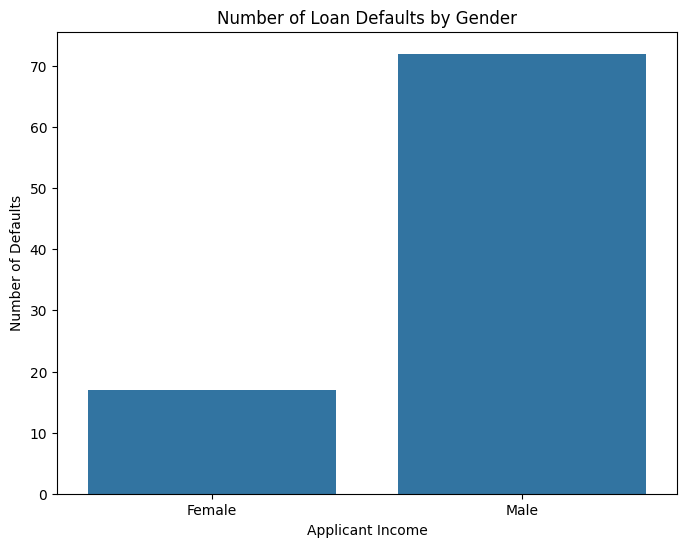

In [ ]:
# Plotting the number of defaults by Gender and ApplicantIncome
plt.figure(figsize=(8, 6))
sns.barplot(data=total_defaults_by_gender, x='Gender', y='Default_Count')
plt.title('Number of Loan Defaults by Gender')
plt.xlabel('Applicant Income')
plt.ylabel('Number of Defaults')
plt.show()


Correlation

In [ ]:
corr = loan_data.corr(numeric_only=True)
corr

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents           1.000000         0.118202           0.030430    0.163103   
ApplicantIncome      0.118202         1.000000          -0.116605    0.565181   
CoapplicantIncome    0.030430        -0.116605           1.000000    0.189218   
LoanAmount           0.163103         0.565181           0.189218    1.000000   
Loan_Amount_Term    -0.103864        -0.046531          -0.059383    0.036960   
Credit_History      -0.040160        -0.018615           0.011134   -0.000607   

                   Loan_Amount_Term  Credit_History  
Dependents                -0.103864       -0.040160  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036960       -0.000607  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr, fmt = ".3f", annot = True, cmap = 'Spectral_r')
plt.show()

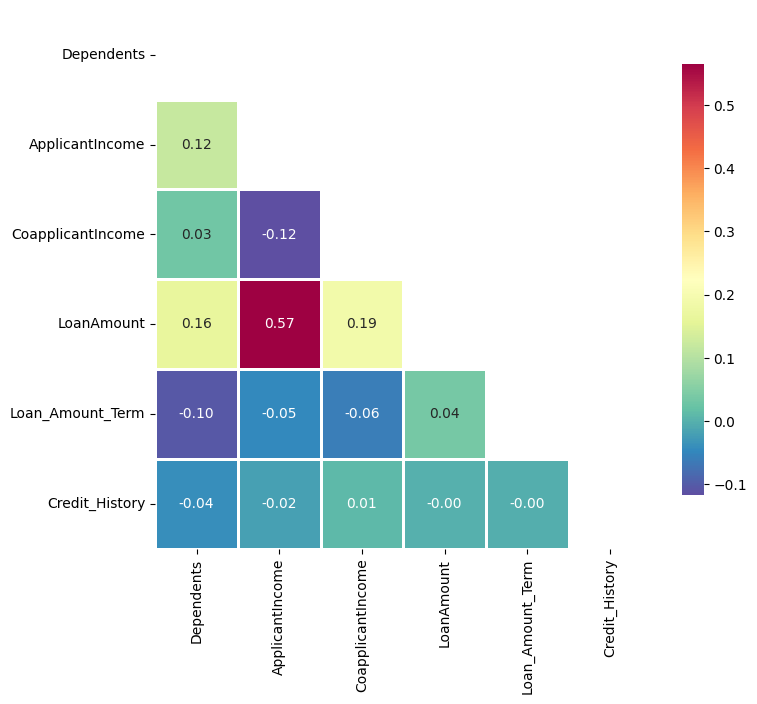

In [ ]:
# creating a mask to keep only the half of the correlation table
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot = corr,mask=mask,cmap = 'Spectral_r',linewidths=1,fmt=".2f",cbar_kws={"shrink": .8})
plt.show()

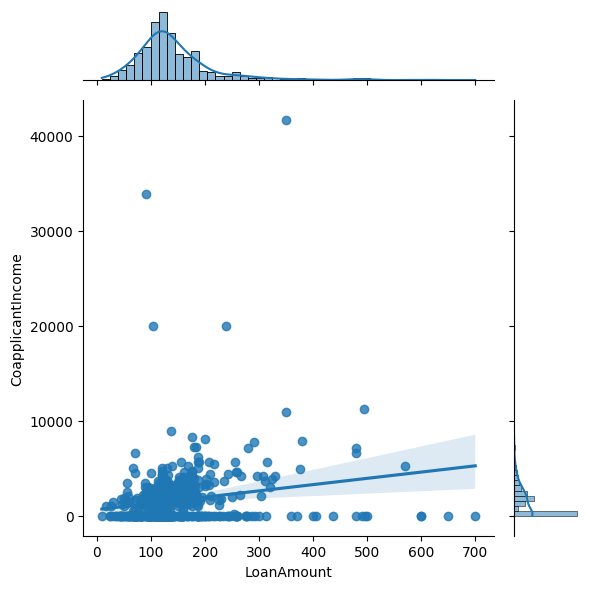

In [ ]:
# Joint plots for detailed analysis of specific pairs
sns.jointplot(x='LoanAmount', y='ApplicantIncome', kind='reg', data=loan_data)
sns.jointplot(x='LoanAmount', y='CoapplicantIncome', kind='reg', data=loan_data)
plt.tight_layout()
plt.show()

From the correlation matrix,  
* There's a positive linear relationship (0.566) [moderate] between the Loan amonut and the applicant income.  
* There's a weak linear relationship between the loan amount and the coapplicant income indicating that the coapplicacount does not significantly influence the loan amount.

**Target Variable**

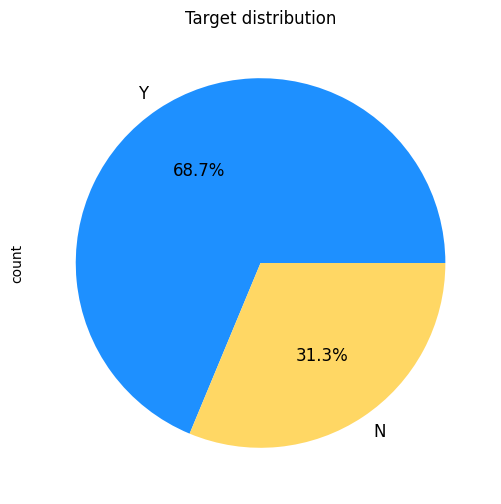

In [ ]:
# Target distribution
plt.figure(figsize=(8,6))
colors = ['#1E90FF', '#FFD764']
# Pie plot
loan_data['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors,
                                                      textprops={'fontsize':12}).set_title("Target distribution");
plt.show()

The target classes are inbalanced

# **Model Building**

#**Import Libraries and Load Data**

**Importing packages for machine learning , classification, predictions, and algorithms.**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns

#Preprocessing and feature transformation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# splitting data and model evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

#Data Preprocessing

ML models only accept numeric imput. Hence, categorical data must be converted to numerical data.

Use LabelEncoder to convert categorical values to ordered integer values for the ML algorithms and models.

To preprocess the data, import preprocessing module from Scikit Learn (sklearn)

In [ ]:
for cols in loan_data:
  print(cols)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [ ]:
loan_data.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0               360   
1             4583             1508.0       128.0               360   
2             3000                0.0        66.0               360   
3             2583             2358.0       120.0               360   
4             6000                0.0       141.0               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Rural           N  
2               1         Urban           Y  
3               1         Urban           Y  
4               1         Urban           Y

In [ ]:
loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
#Convert categorical values to orodered integer values(typically used for ordinal data but suitable for gender)
label_encoding = preprocessing.LabelEncoder()

Gender

In [ ]:
loan_data['Gender'] = label_encoding.fit_transform(loan_data['Gender'].astype(str))

In [ ]:
loan_data['Gender'].unique()

array([1, 0])

In [ ]:
label_encoding.classes_

array(['Female', 'Male'], dtype=object)

0 -Female  
1 = Male  


Married

In [ ]:
loan_data['Married'] = label_encoding.fit_transform(loan_data['Married'].astype(str))

In [ ]:
loan_data['Married'].unique()

array([0, 1])

In [ ]:
label_encoding.classes_

array(['No', 'Yes'], dtype=object)

0 -No  
1 -Yes

Self_Employment

In [ ]:
loan_data['Self_Employed'] = label_encoding.fit_transform(loan_data['Self_Employed'].astype(str))

In [ ]:
loan_data['Self_Employed'].unique()

array([0, 1])

In [ ]:
label_encoding.classes_

array(['No', 'Yes'], dtype=object)

0 -No   
1 -Yes

Education

In [ ]:
loan_data['Education'] = label_encoding.fit_transform(loan_data['Education'].astype(str))

In [ ]:
loan_data['Education'].unique()

array([0, 1])

In [ ]:
label_encoding.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

0 -Graduate  
1 -Not Graduate

Loan_Status

In [ ]:
loan_data['Loan_Status'] = label_encoding.fit_transform(loan_data['Loan_Status'].astype(str))

In [ ]:
loan_data['Loan_Status'].unique()

array([1, 0])

In [ ]:
label_encoding.classes_

array(['N', 'Y'], dtype=object)

0 -No  
1 -Yes

**One-hot encoding**

Property_Area

In [ ]:
loan_data = pd.get_dummies(loan_data, columns=['Property_Area'],drop_first = True)

In [ ]:
loan_data[['Property_Area_Urban','Property_Area_Semiurban']] = loan_data[['Property_Area_Urban','Property_Area_Semiurban']].astype(int)

In [ ]:
loan_data

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001002       1        0           0          0              0   
1    LP001003       1        1           1          0              0   
2    LP001005       1        1           0          0              1   
3    LP001006       1        1           0          1              0   
4    LP001008       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978       0        0           0          0              0   
610  LP002979       1        1           3          0              0   
611  LP002983       1        1           1          0              0   
612  LP002984       1        1           2          0              0   
613  LP002990       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0               360   
1               4583             1508.0       128.0               360   
2               3000                0.0        66.0               360   
3               2583             2358.0       120.0               360   
4               6000                0.0       141.0               360   
..               ...                ...         ...               ...   
609             2900                0.0        71.0               360   
610             4106                0.0        40.0               180   
611             8072              240.0       253.0               360   
612             7583                0.0       187.0               360   
613             4583                0.0       133.0               360   

     Credit_History  Loan_Status  Property_Area_Semiurban  Property_Area_Urban  
0                 1            1                        0                    1  
1                 1            0                        0                    0  
2                 1            1                        0                    1  
3                 1            1                        0                    1  
4                 1            1                        0                    1  
..              ...          ...                      ...                  ...  
609               1            1                        0                    0  
610               1            1                        0                    0  
611               1            1                        0                    1  
612               1            1                        0                    1  
613               0            0                        1                    0  

[614 rows x 14 columns]

So for the first row,   
The Property_Area is 'Urban'. Hence, 'Semiurban' and 'Rural' are 0

ie.  
Rural = 100  
Semiurban = 010  
Urban = 001

There are categprical variables with about 90% difference. Hence, we drop them.

###Feature Engineering


In [ ]:
loan_data=loan_data.drop(columns=(['Loan_ID']))

In [ ]:
loan_data=loan_data.drop(columns=(['Gender','Self_Employed']))

In [ ]:
loan_data.head(5)

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
0        0           0          0             5849                0.0   
1        1           1          0             4583             1508.0   
2        1           0          0             3000                0.0   
3        1           0          1             2583             2358.0   
4        0           0          0             6000                0.0   

   LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
0       128.0               360               1            1   
1       128.0               360               1            0   
2        66.0               360               1            1   
3       120.0               360               1            1   
4       141.0               360               1            1   

   Property_Area_Semiurban  Property_Area_Urban  
0                        0                    1  
1                        0                    0  
2                        0                    1  
3                        0                    1  
4                        0                    1

***The data is set for the ML model***

In [ ]:
loan_data.to_csv('/content/drive/MyDrive/Bloossom/Data Science/Machine Learning/ML Project/loan_data_preprocessed.csv', index=False)

In [ ]:
#importing the preprocessed dataset
loan =  pd.read_csv('/content/drive/MyDrive/Bloossom/Data Science/Machine Learning/ML Project/loan_data_preprocessed.csv')

In [ ]:
loan

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
0          0           0          0             5849                0.0   
1          1           1          0             4583             1508.0   
2          1           0          0             3000                0.0   
3          1           0          1             2583             2358.0   
4          0           0          0             6000                0.0   
..       ...         ...        ...              ...                ...   
609        0           0          0             2900                0.0   
610        1           3          0             4106                0.0   
611        1           1          0             8072              240.0   
612        1           2          0             7583                0.0   
613        0           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
0         128.0               360               1            1   
1         128.0               360               1            0   
2          66.0               360               1            1   
3         120.0               360               1            1   
4         141.0               360               1            1   
..          ...               ...             ...          ...   
609        71.0               360               1            1   
610        40.0               180               1            1   
611       253.0               360               1            1   
612       187.0               360               1            1   
613       133.0               360               0            0   

     Property_Area_Semiurban  Property_Area_Urban  
0                          0                    1  
1                          0                    0  
2                          0                    1  
3                          0                    1  
4                          0                    1  
..                       ...                  ...  
609                        0                    0  
610                        0                    0  
611                        0                    1  
612                        0                    1  
613                        1                    0  

[614 rows x 11 columns]

In [ ]:
loan.shape

(614, 11)

The number of columns reduced after dropping irrelevant columns.  
But one-hot encoding has increased the number of columns by adding 3 new columns.

**It is necessary to check the ditrbutions of each variable and apply scaling to standardize or normalize them if need be.**

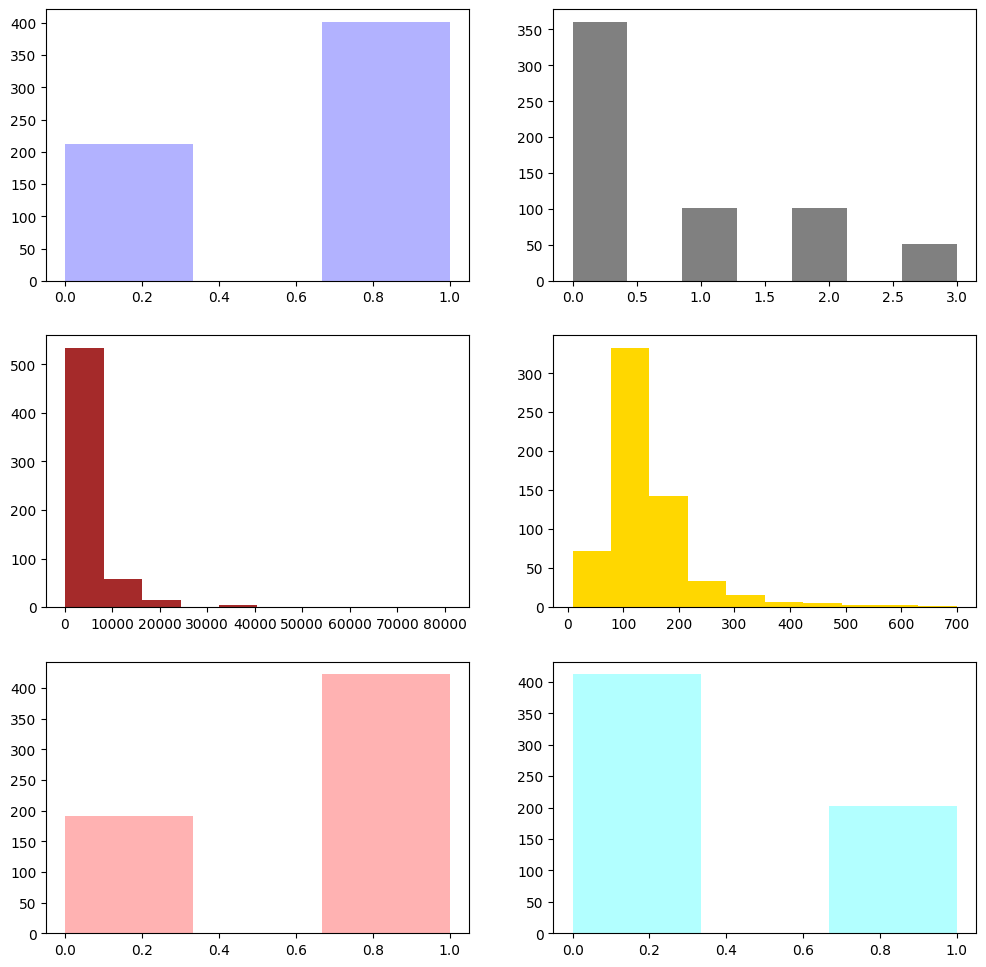

In [ ]:
fig,axes =plt.subplots (nrows = 3, ncols = 2 ,figsize=(12,12))

#loan['Gender'].hist(color = 'g',alpha = 0.5, ax =axes[0,0], label = 'Age', grid =False)
loan['Married'].hist(color = 'b' ,alpha = 0.3,ax =axes[0,0], label = 'Balance', grid =False,bins = 3)
loan['Dependents'].hist(color = 'grey', ax =axes[0,1], label = 'Dependents', grid =False,bins = 7)
loan['ApplicantIncome'].hist(color = 'brown', ax =axes[1,0], label = 'ApplicantIncome', grid =False,bins = 10)
loan['LoanAmount'].hist(color = 'gold',ax =axes[1,1], label = 'LoanAmount', grid =False,bins = 10)
loan['Loan_Status'].hist(color = 'red',alpha = 0.3,ax =axes[2,0], label = 'Loan_Status', grid =False,bins = 3)
loan['Property_Area_Urban'].hist(color = 'cyan',alpha = 0.3, ax =axes[2,1], label = 'Property_Area_Urban', grid =False,bins = 3)

plt.show()

In [ ]:
fig,axes =plt.subplots (nrows = 3, ncols = 2 ,figsize=(14,10))
sns.distplot(loan['Property_Area_Urban'],hist = True, ax=axes[0,0], color='green')
sns.distplot(loan['Dependents'], ax=axes[0,1], color='b')
sns.distplot(loan['Married'],hist = False, ax=axes[1,0], color='b')
sns.distplot(loan['ApplicantIncome'],hist = False, ax=axes[2,0], color='gold')
sns.distplot(loan['LoanAmount'], ax=axes[1,1], color='brown')
sns.distplot(loan['Loan_Status'],hist = False, ax=axes[2,1], color='grey')
plt.show()

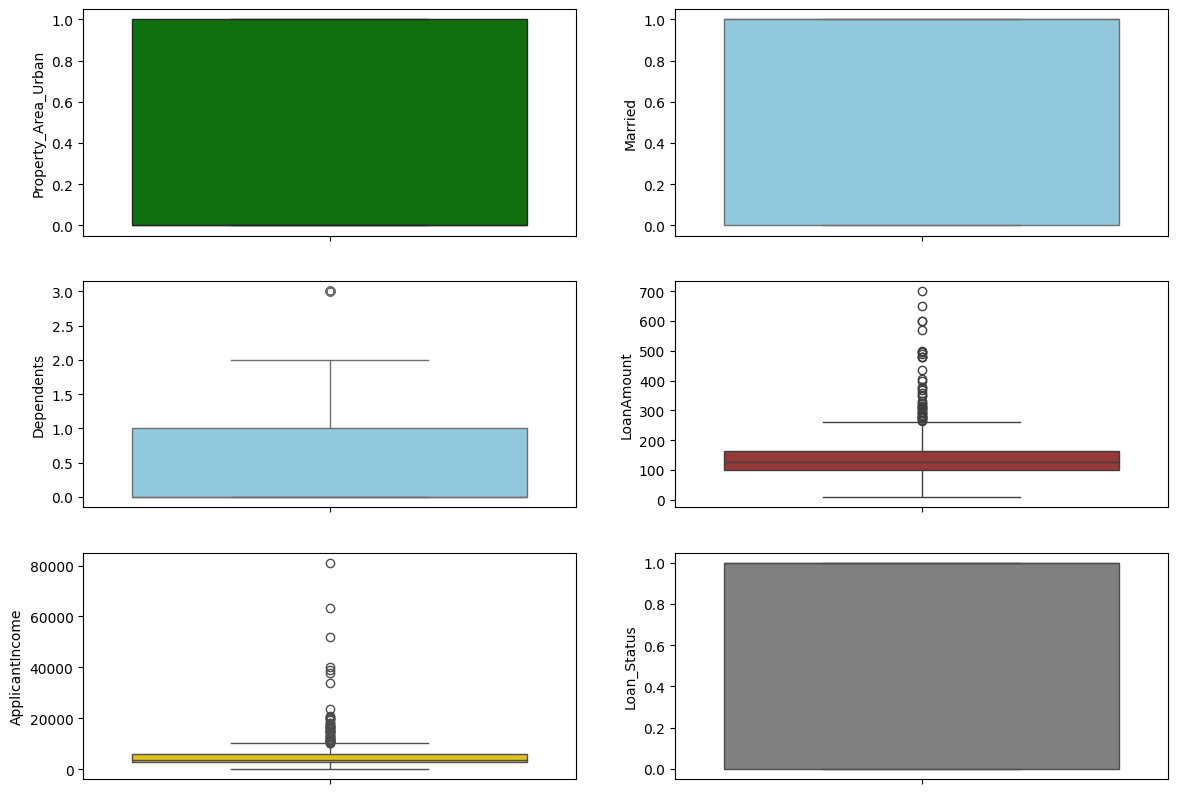

In [ ]:
fig,axes =plt.subplots (nrows = 3, ncols = 2 ,figsize=(14,10))
sns.boxplot(loan['Property_Area_Urban'],orient = 'v', ax=axes[0,0], color ='g')
sns.boxplot(loan['Married'],orient = 'v', ax=axes[0,1], color ='skyblue')
sns.boxplot(loan['Dependents'],orient = 'v', ax=axes[1,0], color ='skyblue')
sns.boxplot(loan['LoanAmount'],orient = 'v', ax=axes[1,1], color ='brown')
sns.boxplot(loan['ApplicantIncome'],orient = 'v', ax=axes[2,0], color ='gold')
sns.boxplot(loan['Loan_Status'],orient = 'v', ax=axes[2,1], color ='grey')
plt.show()

There are otliers in the code  
These outliers are reasonable as individuals can have extremely high income or need higher loans than others.

#Heatmap

In [ ]:
cor = loan.corr().abs()
cor

Married  Dependents  Education  ApplicantIncome  \
Married                  1.000000    0.334216   0.012304         0.051708   
Dependents               0.334216    1.000000   0.055752         0.118202   
Education                0.012304    0.055752   1.000000         0.140760   
ApplicantIncome          0.051708    0.118202   0.140760         1.000000   
CoapplicantIncome        0.075948    0.030430   0.062290         0.116605   
LoanAmount               0.146546    0.163103   0.168759         0.565181   
Loan_Amount_Term         0.100912    0.103864   0.073928         0.046531   
Credit_History           0.010938    0.040160   0.073658         0.018615   
Loan_Status              0.091478    0.010118   0.085884         0.004710   
Property_Area_Semiurban  0.005845    0.001924   0.039410         0.014246   
Property_Area_Urban      0.000546    0.001198   0.034279         0.000598   

                         CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Married                           0.075948    0.146546          0.100912   
Dependents                        0.030430    0.163103          0.103864   
Education                         0.062290    0.168759          0.073928   
ApplicantIncome                   0.116605    0.565181          0.046531   
CoapplicantIncome                 1.000000    0.189218          0.059383   
LoanAmount                        0.189218    1.000000          0.036960   
Loan_Amount_Term                  0.059383    0.036960          1.000000   
Credit_History                    0.011134    0.000607          0.004705   
Loan_Status                       0.059187    0.033214          0.022549   
Property_Area_Semiurban           0.027044    0.005804          0.059141   
Property_Area_Urban               0.022776    0.036050          0.094279   

                         Credit_History  Loan_Status  Property_Area_Semiurban  \
Married                        0.010938     0.091478                 0.005845   
Dependents                     0.040160     0.010118                 0.001924   
Education                      0.073658     0.085884                 0.039410   
ApplicantIncome                0.018615     0.004710                 0.014246   
CoapplicantIncome              0.011134     0.059187                 0.027044   
LoanAmount                     0.000607     0.033214                 0.005804   
Loan_Amount_Term               0.004705     0.022549                 0.059141   
Credit_History                 1.000000     0.540556                 0.035976   
Loan_Status                    0.540556     1.000000                 0.136540   
Property_Area_Semiurban        0.035976     0.136540                 1.000000   
Property_Area_Urban            0.016934     0.043621                 0.547574   

                         Property_Area_Urban  
Married                             0.000546  
Dependents                          0.001198  
Education                           0.034279  
ApplicantIncome                     0.000598  
CoapplicantIncome                   0.022776  
LoanAmount                          0.036050  
Loan_Amount_Term                    0.094279  
Credit_History                      0.016934  
Loan_Status                         0.043621  
Property_Area_Semiurban             0.547574  
Property_Area_Urban                 1.000000

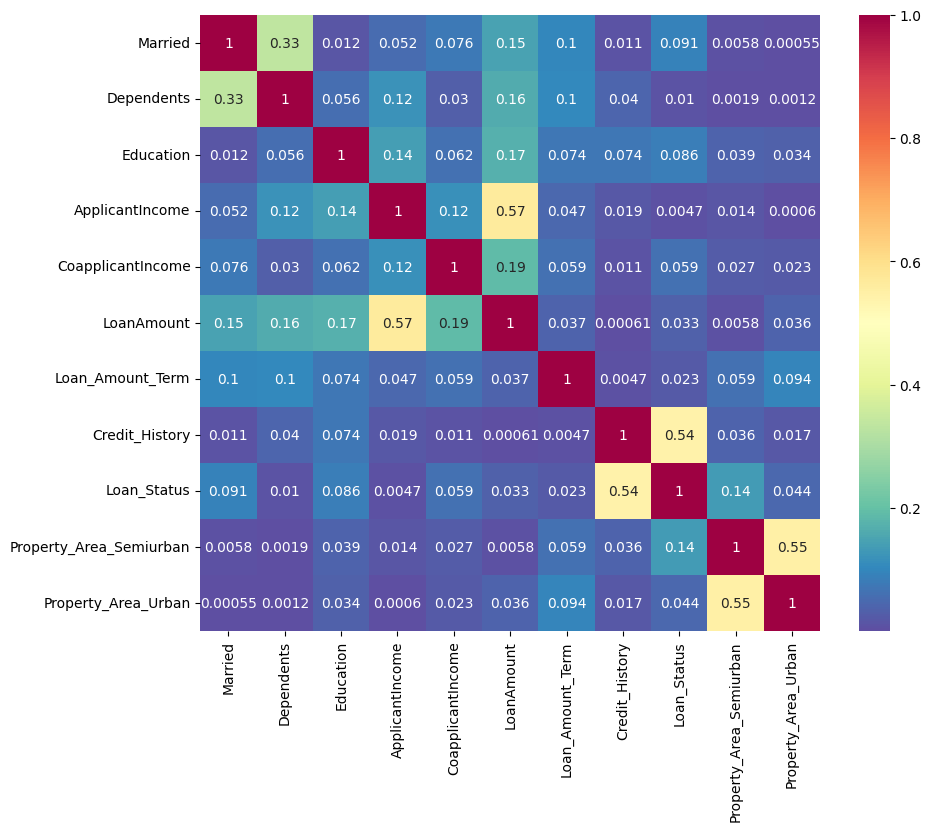

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot = cor,cmap = 'Spectral_r')
plt.show()

In [ ]:
# creating a mask to keep only the half of the correlation table
mask = np.triu(np.ones_like(cor,dtype=bool))

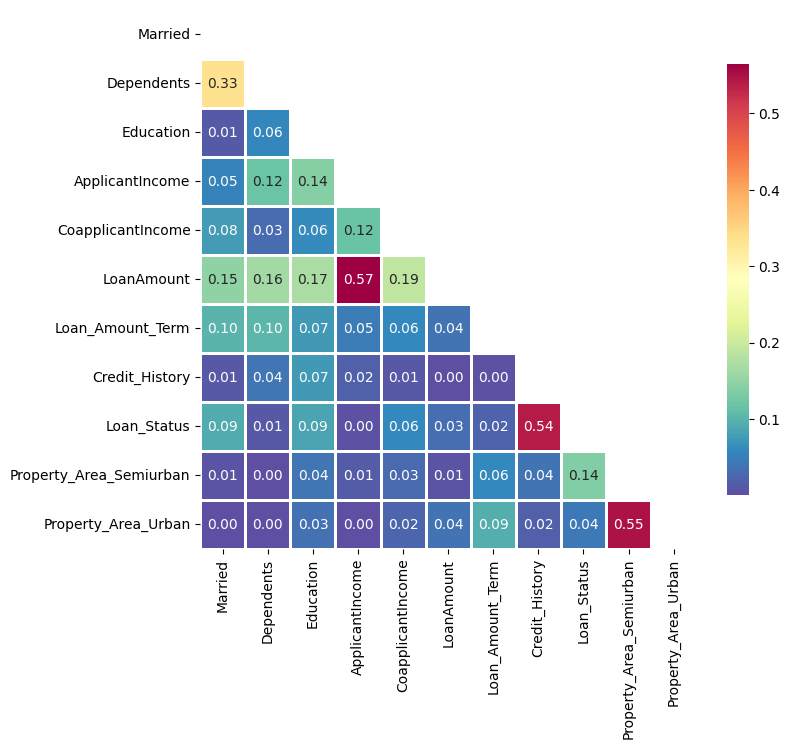

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,mask=mask,cmap = 'Spectral_r',linewidths=1,fmt=".2f",cbar_kws={"shrink": .8})
plt.show()

Overall, there is a positive correlation between the variables.  

There is a moderate positive correlation (0.54) between credit history and loan status indicating its influence on the target variable(Hence column can not be dropped even with the variations )

Thers is a moderate positive correlation (0.57) between applicant income and the loan amount


# **Separating Features and Target Variable**

In [ ]:
X = loan.drop(columns=['Loan_Status'], axis = 1)
y = loan['Loan_Status']

In [ ]:
X

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
0          0           0          0             5849                0.0   
1          1           1          0             4583             1508.0   
2          1           0          0             3000                0.0   
3          1           0          1             2583             2358.0   
4          0           0          0             6000                0.0   
..       ...         ...        ...              ...                ...   
609        0           0          0             2900                0.0   
610        1           3          0             4106                0.0   
611        1           1          0             8072              240.0   
612        1           2          0             7583                0.0   
613        0           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area_Semiurban  \
0         128.0               360               1                        0   
1         128.0               360               1                        0   
2          66.0               360               1                        0   
3         120.0               360               1                        0   
4         141.0               360               1                        0   
..          ...               ...             ...                      ...   
609        71.0               360               1                        0   
610        40.0               180               1                        0   
611       253.0               360               1                        0   
612       187.0               360               1                        0   
613       133.0               360               0                        1   

     Property_Area_Urban  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1  
..                   ...  
609                    0  
610                    0  
611                    1  
612                    1  
613                    0  

[614 rows x 10 columns]

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
X.shape

(614, 10)

In [ ]:
y.shape

(614,)

In [ ]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
X.columns

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
loan

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
0          0           0          0             5849                0.0   
1          1           1          0             4583             1508.0   
2          1           0          0             3000                0.0   
3          1           0          1             2583             2358.0   
4          0           0          0             6000                0.0   
..       ...         ...        ...              ...                ...   
609        0           0          0             2900                0.0   
610        1           3          0             4106                0.0   
611        1           1          0             8072              240.0   
612        1           2          0             7583                0.0   
613        0           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
0         128.0               360               1            1   
1         128.0               360               1            0   
2          66.0               360               1            1   
3         120.0               360               1            1   
4         141.0               360               1            1   
..          ...               ...             ...          ...   
609        71.0               360               1            1   
610        40.0               180               1            1   
611       253.0               360               1            1   
612       187.0               360               1            1   
613       133.0               360               0            0   

     Property_Area_Semiurban  Property_Area_Urban  
0                          0                    1  
1                          0                    0  
2                          0                    1  
3                          0                    1  
4                          0                    1  
..                       ...                  ...  
609                        0                    0  
610                        0                    0  
611                        0                    1  
612                        0                    1  
613                        1                    0  

[614 rows x 11 columns]

<Axes: >

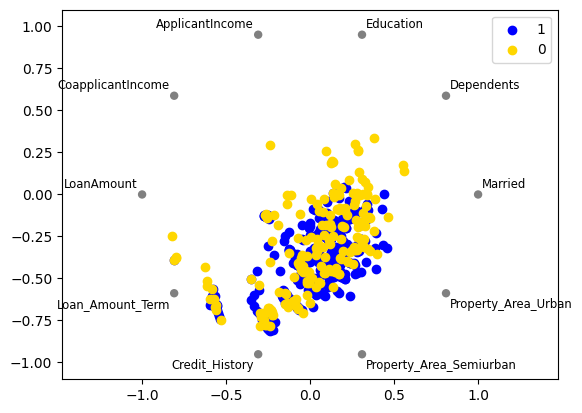

In [ ]:
pd.plotting.radviz(loan, 'Loan_Status', color=['blue', 'gold'])

#**Split the Data into Training and Testing Sets**

In [ ]:
#Splitting into training and test dataset for model performance and evaluation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =0, stratify=y)

Random_state = 0 is the best for the data

In [ ]:
X_train.shape, y_train.shape

((429, 10), (429,))

In [ ]:
y_train.value_counts()

Loan_Status
1    295
0    134
Name: count, dtype: int64

**Balancing the target variable**

In [ ]:
from imblearn.over_sampling import SMOTE
# Address class imbalance using SMOTE
sampling= SMOTE(random_state=42)
X_train, y_train = sampling.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

Loan_Status
1    295
0    295
Name: count, dtype: int64

In [ ]:
balance = pd.DataFrame(X_train, y_train).reset_index()
balance

Loan_Status  Married  Dependents  Education  ApplicantIncome  \
0              1        0           0          0             5941   
1              1        0           0          0             5941   
2              0        1           2          0             2500   
3              1        0           0          0             5941   
4              1        0           0          0             5941   
..           ...      ...         ...        ...              ...   
585            0        1           2          0             2500   
586            0        1           2          0             2500   
587            0        1           2          0             2500   
588            0        1           2          0             2500   
589            0        1           2          0             2500   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               4232.0       296.0               360               1   
1               4232.0       296.0               360               1   
2               1840.0       109.0               360               1   
3               4232.0       296.0               360               1   
4               4232.0       296.0               360               1   
..                 ...         ...               ...             ...   
585             1840.0       109.0               360               1   
586             1840.0       109.0               360               1   
587             1840.0       109.0               360               1   
588             1840.0       109.0               360               1   
589             1840.0       109.0               360               1   

     Property_Area_Semiurban  Property_Area_Urban  
0                          1                    0  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
..                       ...                  ...  
585                        0                    1  
586                        0                    1  
587                        0                    1  
588                        0                    1  
589                        0                    1  

[590 rows x 11 columns]

In [ ]:
pd.plotting.radviz(balance, 'Loan_Status', color=['blue', 'gold'])

<Axes: >

The target variable is balanced

# **Unscaled Algorithms**

**SVC**

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
print("Train score: {:.2f}".format(svc.score(X_train, y_train)))
print("Test score: {:.2f}".format(svc.score(X_test, y_test)))
y_pred = svc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.58
Test score: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.45      0.39        58
           1       0.71      0.61      0.65       127

    accuracy                           0.56       185
   macro avg       0.52      0.53      0.52       185
weighted avg       0.59      0.56      0.57       185



**Logistic Regression**




In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print("Train score: {:.2f}".format(log_reg.score(X_train, y_train)))
print("Test score: {:.2f}".format(log_reg.score(X_test, y_test)))
y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.78
Test score: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68        58
           1       0.85      0.86      0.85       127

    accuracy                           0.80       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.80      0.80      0.80       185



Although logistic regression is performing better, it's still necessary to scale

**KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.75
Test score: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.43      0.38        58
           1       0.70      0.61      0.65       127

    accuracy                           0.55       185
   macro avg       0.52      0.52      0.51       185
weighted avg       0.59      0.55      0.56       185



The perfomance on the unscaled data is very poor hence scaling is a necessary step.

**Choosing the appropriate scaling method for specific algorithm for the data.**

Algorithms:
* Logistic Regression
* SVM
* KNN

# **Pipeline(Best Scaler)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

**SVC**

In [ ]:
pipe1a = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])

pipe1a.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe1a.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe1a.score(X_test, y_test)))

Train score: 0.82
Test score: 0.82


In [ ]:
pipe1b = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe1b.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe1b.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe1b.score(X_test, y_test)))

Train score: 0.80
Test score: 0.81


In [ ]:
pipe1c = Pipeline([("scaler", RobustScaler()), ("svm", SVC())])
pipe1c.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe1c.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe1c.score(X_test, y_test)))

Train score: 0.55
Test score: 0.66


The best scaler for SVC is StandardScaler

**Logistic Regression**

In [ ]:
pipe2a = Pipeline([("scaler", StandardScaler()), ("log_reg", LogisticRegression())])

pipe2a.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe2a.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe2a.score(X_test, y_test)))
y_pred = pipe2a.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.80
Test score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66        58
           1       0.83      0.90      0.86       127

    accuracy                           0.81       185
   macro avg       0.78      0.75      0.76       185
weighted avg       0.80      0.81      0.80       185



In [ ]:
pipe2b = Pipeline([("scaler", MinMaxScaler()), ("log_reg", LogisticRegression())])

pipe2b.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe2b.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe2b.score(X_test, y_test)))
y_pred = pipe2b.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.80
Test score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.67        58
           1       0.83      0.91      0.87       127

    accuracy                           0.81       185
   macro avg       0.79      0.75      0.77       185
weighted avg       0.81      0.81      0.80       185



In [ ]:
pipe2c = Pipeline([("scaler", RobustScaler()), ("log_reg", LogisticRegression())])

pipe2c.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe2c.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe2c.score(X_test, y_test)))

Train score: 0.80
Test score: 0.81


The best scaler for Logistic Regression is StandardScaler based on both accuracy and f1-score

**KNN**

In [ ]:
pipe3a = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

pipe3a.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe3a.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe3a.score(X_test, y_test)))

y_pred = pipe3a.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.84
Test score: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61        58
           1       0.81      0.88      0.85       127

    accuracy                           0.78       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.77      0.78      0.77       185



In [ ]:
pipe3b = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])

pipe3b.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe3b.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe3b.score(X_test, y_test)))
y_pred = pipe3b.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.83
Test score: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        58
           1       0.81      0.91      0.86       127

    accuracy                           0.79       185
   macro avg       0.77      0.72      0.74       185
weighted avg       0.79      0.79      0.78       185



In [ ]:
pipe3c = Pipeline([("scaler", RobustScaler()), ("knn", KNeighborsClassifier())])

pipe3c.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe3c.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe3c.score(X_test, y_test)))
y_pred = pipe3c.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.84
Test score: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        58
           1       0.79      0.82      0.81       127

    accuracy                           0.73       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.72      0.73      0.73       185



The  best scaler for Knn is StandardScaler based on both accuracy and f1-score

**Unscaled Data**

Algorithm:
* Random Forest Classifier
* Naive Bayes
* Gradient Boosting Algorithms

RandomForest

In [ ]:
rfc= RandomForestClassifier(n_estimators=200,
    max_depth=9)
rfc.fit(X_train,y_train)
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = rfc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.75
Test score: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64        58
           1       0.82      0.88      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.73      0.74       185
weighted avg       0.78      0.79      0.78       185



In [ ]:
pipe4 = Pipeline([("scaler", StandardScaler()), ("rfc", RandomForestClassifier(n_estimators=200,
    max_depth=9))])

pipe4.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe4.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe4.score(X_test, y_test)))
y_pred = pipe4.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.97
Test score: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65        58
           1       0.83      0.90      0.86       127

    accuracy                           0.80       185
   macro avg       0.77      0.74      0.75       185
weighted avg       0.79      0.80      0.79       185



#**Building Pipelines**

In [ ]:
 # Create pipelines for each model
pipelines = {
    'SVC': Pipeline([("scaler", StandardScaler()), ("SVC", SVC(probability=True))]),
    'Logistic Regression': Pipeline([("scaler", StandardScaler()), ("Logistic Regression", LogisticRegression())]),
    'KNN': Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    'Random Forest': Pipeline([("scaler", StandardScaler()), ("Random Forest", RandomForestClassifier())]), 'Naive Bayes': Pipeline([("scaler", StandardScaler()), ("Naive Bayes", GaussianNB())]),
    'XGBoost':Pipeline([("scaler", StandardScaler()), ("XGBoost", XGBClassifier(seed = 42))]),
    'AdaBoost':Pipeline([("scaler", StandardScaler()), ("AdaBoost", AdaBoostClassifier())]),
    'CatBoost':Pipeline([("scaler", StandardScaler()), ("CatBoost", CatBoostClassifier())]),
    'Gradient Boost':Pipeline([("scaler", StandardScaler()), ("Gradient Boost", GradientBoostingClassifier())])
}

#**Model Building**

In [ ]:
# Function to evaluate models
def evaluate_pipeline(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test, y_test_pred)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1_score:.4f}')
    print(f'Test F1 Score: {test_f1_score:.4f}')

    print('Confusion Matrix (Test Data):')
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix (Test Data)')
    plt.show()

    return train_accuracy, test_accuracy, train_f1_score, test_f1_score

Hyper-parameter tuning

In [ ]:
# Define parameter grids for GridSearchCV
param_grids = {
     'SVC': {'SVC__C': [0.1, 1, 10], 'SVC__gamma': [0.001, 0.01, 0.1]},
    'Logistic Regression': {'Logistic Regression__C': [0.1, 1, 10]},
    'KNN': {'KNN__n_neighbors': [3, 5, 7, 9]},
    'Random Forest': {'Random Forest__n_estimators': [50, 100, 200], 'Random Forest__max_depth': [3, 5, 7, 9,10,12]},
    'Naive Bayes': {'Naive Bayes__var_smoothing': [1e-9, 1e-8, 1e-7]},
    'XGBoost': {'XGBoost__n_estimators': [50, 100, 200], 'XGBoost__learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'AdaBoost__n_estimators': [50, 100, 200], 'AdaBoost__learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'CatBoost__n_estimators':[50, 100, 200], 'CatBoost__learning_rate': [0.01, 0.05, 0.1],
    'CatBoost__max_depth': [4, 6, 8]},
    'Gradient Boost': {'Gradient Boost__n_estimators': [50, 100, 200],
    'Gradient Boost__learning_rate': [0.01, 0.05, 0.1],
    'Gradient Boost__max_depth': [3, 5, 7]}
}

# Fit each pipeline and evaluate
results = []


In [ ]:
results

[]

In [ ]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
#Print the model names passed to GridSearchCV
print(f"Algorithms:")
for model, pipeline in pipelines.items():
    print(f"{model}")

Algorithms:
SVC
Logistic Regression
KNN
Random Forest
Naive Bayes
XGBoost
AdaBoost
CatBoost
Gradient Boost


In [ ]:
results1 = []

    f1_scorer = make_scorer(f1_score, average='binary')
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)

    best_pipeline = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_pipeline(best_pipeline, X_train, X_test, y_train, y_test)


Model: SVC
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy: 0.8237
Test Accuracy: 0.8162
Train F1 Score: 0.8395
Test F1 Score: 0.8750
Confusion Matrix (Test Data):


Train Accuracy: 0.8237
Test Accuracy: 0.8162
Train F1 Score: 0.8395
Test F1 Score: 0.8750

Model: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Accuracy: 0.8000
Test Accuracy: 0.8054
Train F1 Score: 0.8145
Test F1 Score: 0.8636
Confusion Matrix (Test Data):


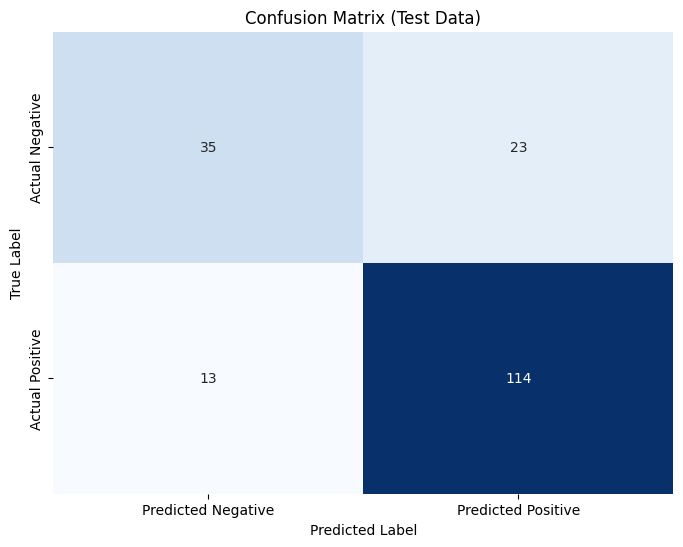

Train Accuracy: 0.8000
Test Accuracy: 0.8054
Train F1 Score: 0.8145
Test F1 Score: 0.8636

Model: KNN
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train Accuracy: 0.8797
Test Accuracy: 0.7514
Train F1 Score: 0.8846
Test F1 Score: 0.8217
Confusion Matrix (Test Data):


Train Accuracy: 0.8797
Test Accuracy: 0.7514
Train F1 Score: 0.8846
Test F1 Score: 0.8217

Model: Random Forest
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Train Accuracy: 0.8508
Test Accuracy: 0.8216
Train F1 Score: 0.8650
Test F1 Score: 0.8791
Confusion Matrix (Test Data):


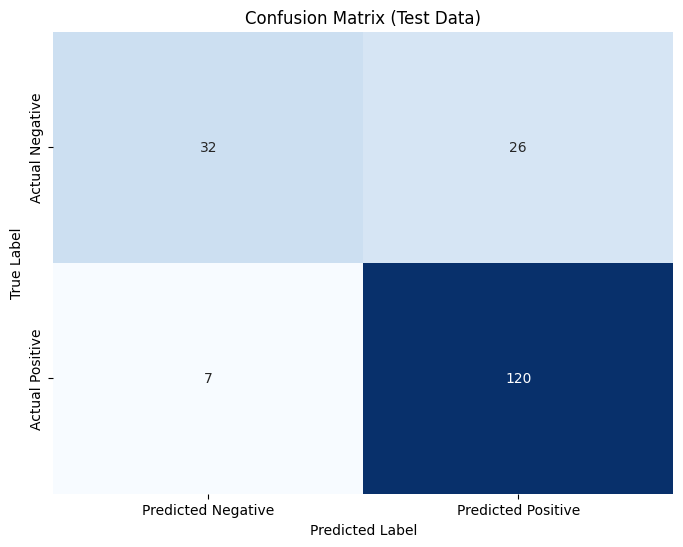

Train Accuracy: 0.8508
Test Accuracy: 0.8216
Train F1 Score: 0.8650
Test F1 Score: 0.8791

Model: Naive Bayes
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Accuracy: 0.7729
Test Accuracy: 0.8108
Train F1 Score: 0.8075
Test F1 Score: 0.8736
Confusion Matrix (Test Data):


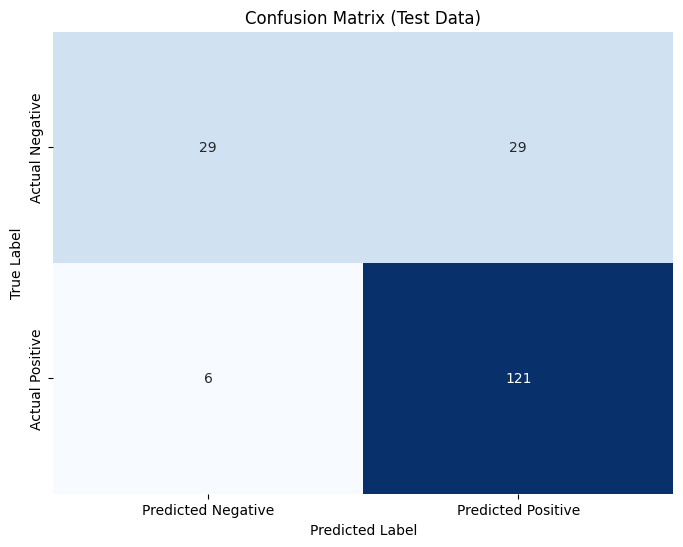

Train Accuracy: 0.7729
Test Accuracy: 0.8108
Train F1 Score: 0.8075
Test F1 Score: 0.8736

Model: XGBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy: 1.0000
Test Accuracy: 0.8108
Train F1 Score: 1.0000
Test F1 Score: 0.8669
Confusion Matrix (Test Data):


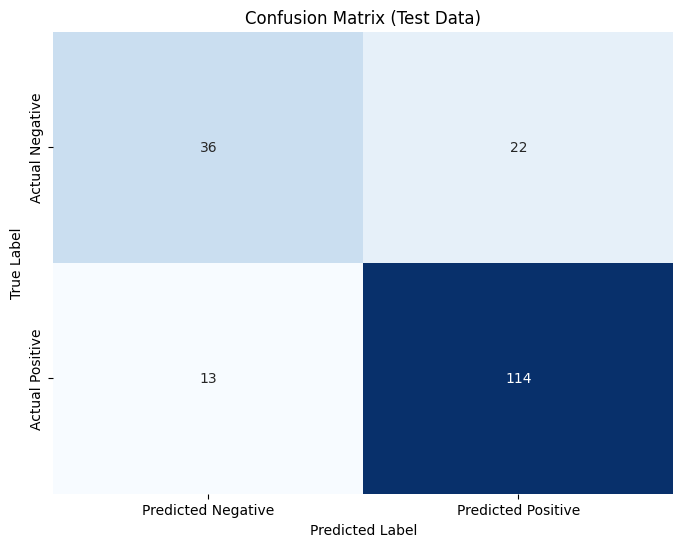

Train Accuracy: 1.0000
Test Accuracy: 0.8108
Train F1 Score: 1.0000
Test F1 Score: 0.8669

Model: AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy: 0.7576
Test Accuracy: 0.8270
Train F1 Score: 0.8017
Test F1 Score: 0.8873
Confusion Matrix (Test Data):


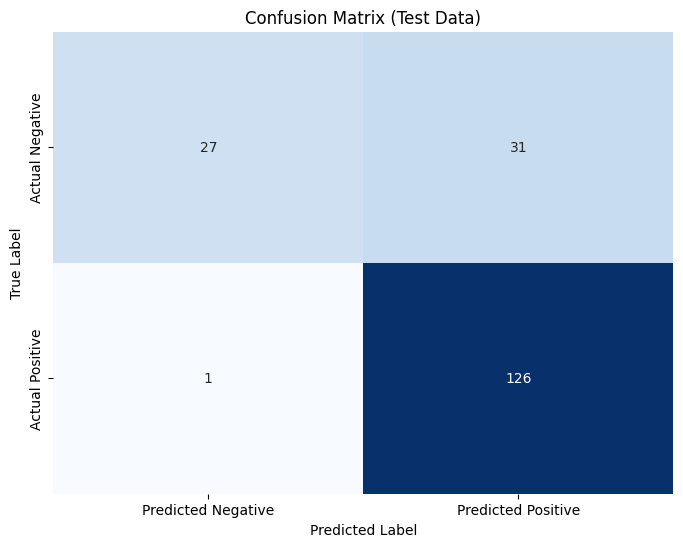

Train Accuracy: 0.7576
Test Accuracy: 0.8270
Train F1 Score: 0.8017
Test F1 Score: 0.8873

Model: CatBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6634246	total: 4.04ms	remaining: 803ms
1:	learn: 0.6333281	total: 7.87ms	remaining: 779ms
2:	learn: 0.6063750	total: 11.4ms	remaining: 749ms
3:	learn: 0.5845058	total: 14.9ms	remaining: 731ms
4:	learn: 0.5640303	total: 18.5ms	remaining: 720ms
5:	learn: 0.5459462	total: 22ms	remaining: 711ms
6:	learn: 0.5292681	total: 25.3ms	remaining: 698ms
7:	learn: 0.5087745	total: 28.6ms	remaining: 687ms
8:	learn: 0.4939342	total: 33.1ms	remaining: 702ms
9:	learn: 0.4800694	total: 38.2ms	remaining: 725ms
10:	learn: 0.4664245	total: 43.5ms	remaining: 748ms
11:	learn: 0.4566827	total: 46.8ms	remaining: 734ms
12:	learn: 0.4441647	total: 50.3ms	remaining: 724ms
13:	learn: 0.4321851	total: 53.7ms	remaining: 714ms
14:	learn: 0.4271441	total: 55ms	remaining: 678ms
15:	learn: 0.4177466	total: 58.6ms	remaining: 674ms
16:	learn: 0.

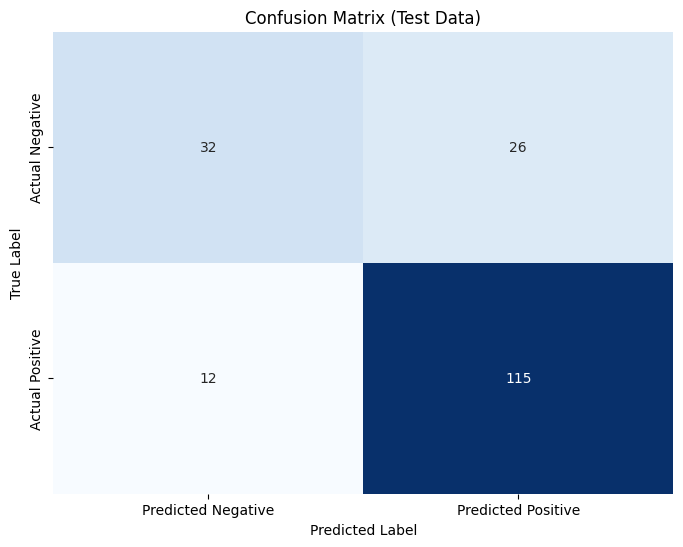

Train Accuracy: 0.9949
Test Accuracy: 0.7946
Train F1 Score: 0.9949
Test F1 Score: 0.8582

Model: Gradient Boost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Train Accuracy: 1.0000
Test Accuracy: 0.7676
Train F1 Score: 1.0000
Test F1 Score: 0.8377
Confusion Matrix (Test Data):


Train Accuracy: 1.0000
Test Accuracy: 0.7676
Train F1 Score: 1.0000
Test F1 Score: 0.8377


In [ ]:
# Using Grid search to find the best hyperparameter for each model
for name, pipeline in pipelines.items():
    print(f'\nModel: {name}')

    # Define F1 score as the metric for evaluation
    f1_scorer = make_scorer(f1_score, average='binary')
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring=f1_scorer, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_pipeline = grid_search.best_estimator_
    train_score = best_pipeline.score(X_train, y_train)
    test_score = best_pipeline.score(X_test, y_test)
    y_pred = best_pipeline.predict(X_test)

    train_acc, test_acc, train_f1, test_f1 = evaluate_pipeline(best_pipeline, X_train, X_test, y_train, y_test)
    results1.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

    print(f'Train Accuracy: {train_acc:.4f}')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')


In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'Gradient Boost__learning_rate': 0.05, 'Gradient Boost__max_depth': 7, 'Gradient Boost__n_estimators': 200}


In [ ]:
results_df = pd.DataFrame(results1)
results_df

Model                                        Best Params  \
0                  SVC                   {'SVC__C': 1, 'SVC__gamma': 0.1}   
1  Logistic Regression                    {'Logistic Regression__C': 0.1}   
2                  KNN                            {'KNN__n_neighbors': 3}   
3        Random Forest  {'Random Forest__max_depth': 5, 'Random Forest...   
4          Naive Bayes              {'Naive Bayes__var_smoothing': 1e-09}   
5              XGBoost  {'XGBoost__learning_rate': 0.2, 'XGBoost__n_es...   
6             AdaBoost  {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n...   
7             CatBoost  {'CatBoost__learning_rate': 0.05, 'CatBoost__m...   
8       Gradient Boost  {'Gradient Boost__learning_rate': 0.05, 'Gradi...   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.823729       0.816216        0.839506       0.875000  
1        0.800000       0.805405        0.814465       0.863636  
2        0.879661       0.751351        0.884553       0.821705  
3        0.850847       0.821622        0.865031       0.879121  
4        0.772881       0.810811        0.807471       0.873646  
5        1.000000       0.810811        1.000000       0.866920  
6        0.757627       0.827027        0.801664       0.887324  
7        0.994915       0.794595        0.994907       0.858209  
8        1.000000       0.767568        1.000000       0.837736

Model Comparison

In [ ]:
# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

#idx = 0 (Train Accuracy)
#axes[idx] =axes[0]

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], color='#1E90FF')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()

In [ ]:
results_df

Model                                        Best Params  \
0                  SVC                   {'SVC__C': 1, 'SVC__gamma': 0.1}   
1  Logistic Regression                    {'Logistic Regression__C': 0.1}   
2                  KNN                            {'KNN__n_neighbors': 3}   
3        Random Forest  {'Random Forest__max_depth': 5, 'Random Forest...   
4          Naive Bayes              {'Naive Bayes__var_smoothing': 1e-09}   
5              XGBoost  {'XGBoost__learning_rate': 0.2, 'XGBoost__n_es...   
6             AdaBoost  {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n...   
7             CatBoost  {'CatBoost__learning_rate': 0.05, 'CatBoost__m...   
8       Gradient Boost  {'Gradient Boost__learning_rate': 0.05, 'Gradi...   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.823729       0.816216        0.839506       0.875000  
1        0.800000       0.805405        0.814465       0.863636  
2        0.879661       0.751351        0.884553       0.821705  
3        0.850847       0.821622        0.865031       0.879121  
4        0.772881       0.810811        0.807471       0.873646  
5        1.000000       0.810811        1.000000       0.866920  
6        0.757627       0.827027        0.801664       0.887324  
7        0.994915       0.794595        0.994907       0.858209  
8        1.000000       0.767568        1.000000       0.837736

In [ ]:
results_df.drop( columns = ['Best Params'], inplace = True)

In [ ]:
# Reset index and start from 1
results_df.reset_index(drop=True)  # Reset index and drop the old index
results_df.index = results_df.index +1  # Change the index to start from 1
results_df

Model  Train Accuracy  Test Accuracy  Train F1 Score  \
1                  SVC        0.823729       0.816216        0.839506   
2  Logistic Regression        0.800000       0.805405        0.814465   
3                  KNN        0.879661       0.751351        0.884553   
4        Random Forest        0.850847       0.821622        0.865031   
5          Naive Bayes        0.772881       0.810811        0.807471   
6              XGBoost        1.000000       0.810811        1.000000   
7             AdaBoost        0.757627       0.827027        0.801664   
8             CatBoost        0.994915       0.794595        0.994907   
9       Gradient Boost        1.000000       0.767568        1.000000   

   Test F1 Score  
1       0.875000  
2       0.863636  
3       0.821705  
4       0.879121  
5       0.873646  
6       0.866920  
7       0.887324  
8       0.858209  
9       0.837736

In [ ]:
from sklearn.metrics import roc_curve
# Dictionary to store ROC curve metrics for each model
model_predictions = {}

# Fit each model and get predicted probabilities
for name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Get predicted probabilities
    if hasattr(pipeline, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # For binary classification
    else:
        y_pred_proba = pipeline.decision_function(X_test)  # For SVM

    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
   # roc_auc = auc(fpr, tpr)

    model_predictions[name] = {
        'fpr': fpr,
        'tpr': tpr,
        #'roc_auc': roc_auc
    }

# Generate color map
num_models = len(model_predictions)
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#2ca02c', '#7f7f7f', '#bcbd22']

# Plot ROC curves
plt.figure()
for (name, preds), color in zip(model_predictions.items(), colors): #(AUC = {preds["roc_auc"]:.2f})
    plt.plot(preds['fpr'], preds['tpr'], label=f'{name} ', color=color)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Learning rate set to 0.008224
0:	learn: 0.6882415	total: 1.68ms	remaining: 1.68s
1:	learn: 0.6831540	total: 3.11ms	remaining: 1.55s
2:	learn: 0.6780370	total: 4.54ms	remaining: 1.51s
3:	learn: 0.6736687	total: 5.94ms	remaining: 1.48s
4:	learn: 0.6684249	total: 7.96ms	remaining: 1.58s
5:	learn: 0.6637412	total: 9.97ms	remaining: 1.65s
6:	learn: 0.6594482	total: 10.8ms	remaining: 1.53s
7:	learn: 0.6545738	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6501904	total: 13.6ms	remaining: 1.49s
9:	learn: 0.6453877	total: 15ms	remaining: 1.49s
10:	learn: 0.6409542	total: 17ms	remaining: 1.53s
11:	learn: 0.6362078	total: 19ms	remaining: 1.57s
12:	learn: 0.6318024	total: 20.5ms	remaining: 1.55s
13:	learn: 0.6284436	total: 21.9ms	remaining: 1.54s
14:	learn: 0.6245313	total: 27.6ms	remaining: 1.81s
15:	learn: 0.6208324	total: 30.2ms	remaining: 1.86s
16:	learn: 0.6167683	total: 34.1ms	remaining: 1.97s
17:	learn: 0.6124815	total: 37.5ms	remaining: 2.04s
18:	learn: 0.6090878	total: 41.1ms	remaining: 2.12

From the ROC curve, Random Forest has the best true positive rate

**Model Selection**

Accuracy is to know if the model is overfitting or underfitting.

The metric we're using is the F1-score due to the imbalance in our data as F1-score is anoptimal evaluation of the performance of the models for imbalanced data.

**Based on the best score (difference)**

In [ ]:
#Calculate the absolute difference between train and test F1-scores
results_df['F1 Score Difference'] = abs(results_df['Train F1 Score'] - results_df['Test F1 Score'])

# Find the row with the minimum F1 score difference
best_model_f1_diff_row = results_df.loc[results_df['F1 Score Difference'].idxmin()& (results_df['Test F1 Score'] .idxmax())]

print("Best Model based on the least difference between Train and Test F1 Scores:")
print(best_model_f1_diff_row)

Best Model based on the least difference between Train and Test F1 Scores:
Model                  Random Forest
Train Accuracy              0.850847
Test Accuracy               0.821622
Train F1 Score              0.865031
Test F1 Score               0.879121
Average Score               0.850371
F1 Score Difference          0.01409
Name: 4, dtype: object


In [ ]:
best_rfc_params = {'max_depth': 5, 'n_estimators': 50}

rfc_model = RandomForestClassifier(**best_rfc_params)

rfc_model.fit(X_train, y_train)

y_test_pred = rfc_model.predict(X_test)

# DataFrame to show true vs predicted values
prediction_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_test_pred
})

prediction_df['Correct Prediction'] = prediction_df['True Label'] == prediction_df['Predicted Label']

print(prediction_df.head(50))

prediction_df.value_counts()

     True Label  Predicted Label  Correct Prediction
418           1                1                True
48            0                0                True
378           0                0                True
606           1                1                True
111           1                1                True
337           1                1                True
514           0                0                True
137           1                1                True
410           0                1               False
232           1                1                True
567           0                0                True
247           1                1                True
570           1                1                True
396           0                0                True
256           0                0                True
97            1                1                True
394           1                1                True
78            0                0              

True Label  Predicted Label  Correct Prediction
1           1                True                  116
0           0                True                   33
            1                False                  25
1           0                False                  11
Name: count, dtype: int64

In [ ]:
prediction_df.isnull().sum()

True Label            0
Predicted Label       0
Correct Prediction    0
dtype: int64

#**Feature Importance**

In [ ]:
importance = pd.DataFrame({"Importance": rfc_model.feature_importances_},
                         index = X_train.columns)
importance

Importance
Married                    0.086342
Dependents                 0.035301
Education                  0.016830
ApplicantIncome            0.088468
CoapplicantIncome          0.070696
LoanAmount                 0.069391
Loan_Amount_Term           0.038128
Credit_History             0.469485
Property_Area_Semiurban    0.106556
Property_Area_Urban        0.018804

This creates a dataframe with the train columns(features) as the index and the calculated importances

Text(0.5, 1.0, 'Features vs Importance')

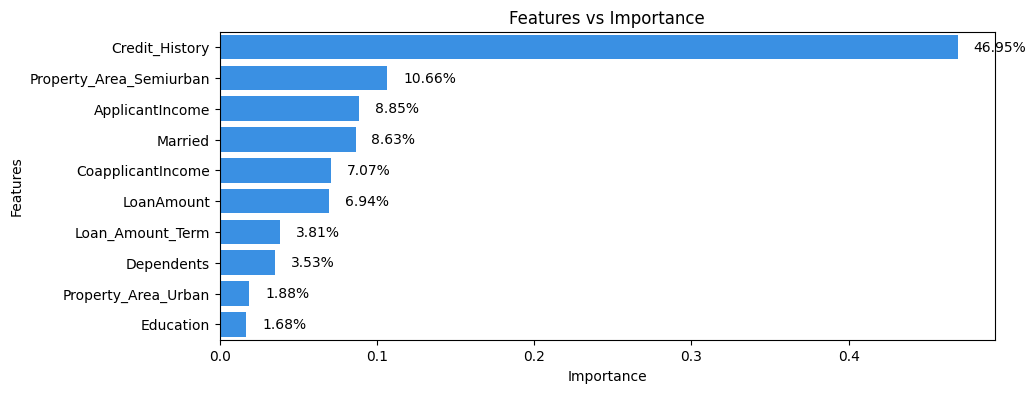

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(y=importance.index, x='Importance',order=importance.sort_values(by='Importance', ascending=False).index,data=importance,color='#1E90FF')
total = len(importance)
for p in plt.gca().patches:
  width = p.get_width()
  plt.text(width + 0.01, p.get_y() + p.get_height() / 2., f'{width:.2%}', va="center")
plt.ylabel('Features')
plt.title('Features vs Importance')